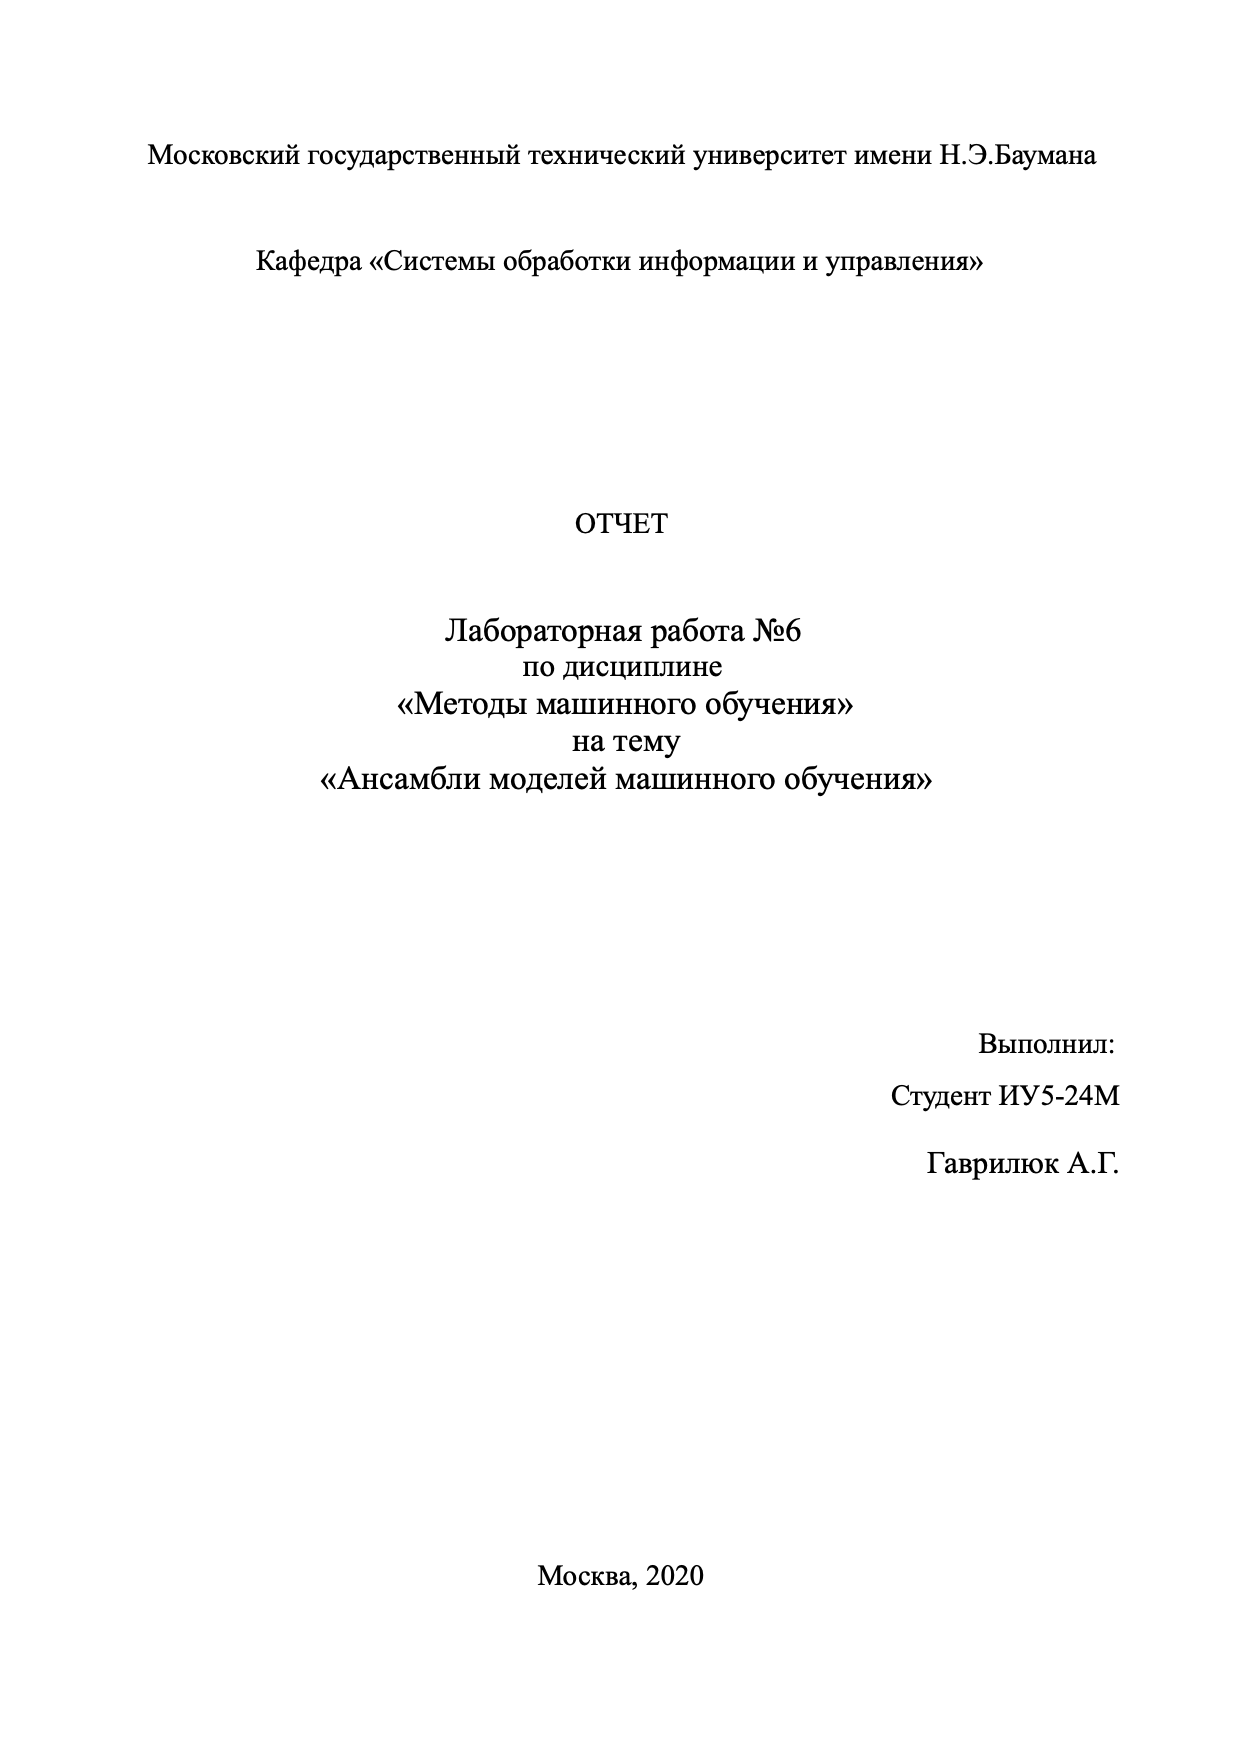

## Задание:
* Выберите набор данных (датасет) для решения задачи классификации или регресии.
* В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
* С использованием метода train_test_split разделите выборку на обучающую и тестовую.
* Обучите две ансамблевые модели. Оцените качество моделей с помощью одной из подходящих для задачи метрик. Сравните качество полученных моделей.
* Произведите для каждой модели подбор значений одного гиперпараметра. В зависимости от используемой библиотеки можно применять * функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.
* Повторите пункт 4 для найденных оптимальных значений гиперпараметров. Сравните качество полученных моделей с качеством моделей, полученных в пункте 4.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,accuracy_score, r2_score 

In [2]:
data = pd.read_csv("Admission_Predict.csv")

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [10]:
data_X = data[["GRE Score", "CGPA", "TOEFL Score"]]

In [6]:
data_X

,GRE Score,CGPA,Chance of Admit
0,337,9.65,0.92
1,324,8.87,0.76
2,316,8.00,0.72
3,322,8.67,0.80
4,314,8.21,0.65
...,...,...,...
395,324,9.04,0.82
396,325,9.11,0.84
397,330,9.45,0.91
398,312,8.78,0.67


In [7]:
data_Y = data[["Chance of Admit "]]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    data_X, data_Y, test_size=0.25, random_state=1)

In [12]:
# Качество отдельных моделей
def val_mae(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plt.plot(X_test, y_test, 'g.')
    plt.plot(X_test, y_pred, 'ro')
    plt.show()
    result = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(model)
    print('MAE={}'.format(result))
    print('R2={}'.format(r2))

/Users/alexandr/Учеба/Мага/mmo/env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


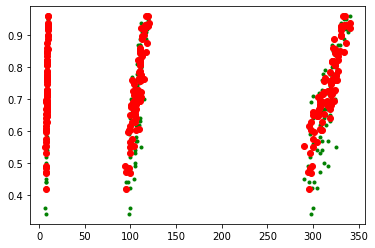

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
MAE=0.05024865346591216
R2=0.7577407758271419




/Users/alexandr/Учеба/Мага/mmo/env/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


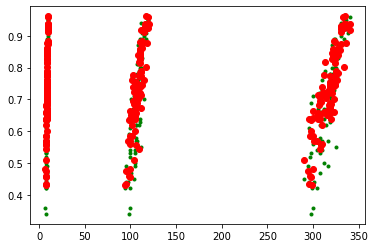

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
MAE=0.05281110000000001
R2=0.7495474036007769




In [13]:
for model in [
    GradientBoostingRegressor(),
    RandomForestRegressor(n_estimators=50)
]:
    val_mae(model)
    print('==========================\n\n')

## Модель градиентного бустинга показала лучший результат на тестовой выборке

In [14]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [15]:
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.9min finished
/Users/alexandr/Учеба/Мага/mmo/env/lib/python3.7/site-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [16]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [17]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    error = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print('Model Performance')
    print('MAE: {:0.4f}'.format(error))
    print('R2 score: {:0.4f}'.format(r2))
    print('======================\n\n')

base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
evaluate(base_model, X_test, y_test)

Model Performance
MAE: 0.0513
R2 score: 0.7635




/Users/alexandr/Учеба/Мага/mmo/env/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


In [18]:
best_random = rf_random.best_estimator_
evaluate(best_random, X_test, y_test)

Model Performance
MAE: 0.0495
R2 score: 0.7680




Видно, что подбор гиперпараметров улучшил нашу модель, уменьшив ошибку  на 0.01

In [19]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid_Booster = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }


In [20]:
gb = GradientBoostingRegressor()

gb_random = RandomizedSearchCV(estimator = gb, param_distributions = random_grid_Booster, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

gb_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   29.4s finished
/Users/alexandr/Учеба/Мага/mmo/env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                             

In [21]:
gb_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 40}

In [22]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    error = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print('Model Performance')
    print('MAE: {:0.4f}'.format(error))
    print('R2 score: {:0.4f}'.format(r2))
    print('======================\n\n')

base_model = GradientBoostingRegressor()
base_model.fit(X_train, y_train)
evaluate(base_model, X_test, y_test)

Model Performance
MAE: 0.0502
R2 score: 0.7583




/Users/alexandr/Учеба/Мага/mmo/env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
best_random = gb_random.best_estimator_
evaluate(best_random, X_test, y_test)

Model Performance
MAE: 0.0525
R2 score: 0.7447




### Подбор параметров в градиентном бустинге не дал прироста качества